In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

In [76]:
from tensorflow.keras.models import Sequential    # Sequential is an interface to create model
from tensorflow.keras.layers import Dense         # Dense is Fully Connected Layers
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras.metrics import RootMeanSquaredError

In [5]:
df = pd.read_csv(r"/content/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [9]:
df.duplicated().sum()

0

In [10]:
x = df.drop(columns=['medv'])
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
y = df['medv']
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.33, random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(339, 13)
(339,)
(167, 13)
(167,)


Model (NN) Building

3 Steps:

    1. Model Definition :
        - Architecture of the model (#HL, #Nodes, Activation Functions)
    2. Model Compilation
        - Optimization Algorithm (SGD, ADAM, ....), Learning Rate, Cost Function
    3. Training
        - Epochs / Iterations, Datasets (Train and Test)

In [54]:
# Model Architecture
model = Sequential()
model.add(Input(shape=(13,)))       # No computation here - This is not mandatory
model.add(Dense(units=1))           # Output layer # w1x1+w2x2+w3x3....

In [50]:
# Model Compilation
# model.compile(optimizer='adam', loss='mean_squared_error')
model.compile(optimizer=Adam(learning_rate = 0.01), loss="mean_squared_error")

In [51]:
# Model Training
model.fit(xtrain, ytrain, epochs=150, validation_data=(xtest, ytest), batch_size=32)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 2739.5728 - val_loss: 1914.7646
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1399.2717 - val_loss: 736.4932
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 565.4789 - val_loss: 240.2263
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 207.1086 - val_loss: 144.2023
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 114.7781 - val_loss: 146.3698
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 111.0430 - val_loss: 142.2788
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 92.9594 - val_loss: 129.2922
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91.3114 - val_loss: 114.3852
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 88.9488 - val_loss: 106.0620
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84.1019 - val_loss: 100.8730
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 73.1546 - val_loss: 95.5512
Epoch 12/150
11/11 ━

In [18]:
model.history.history

{'loss': [305.76788330078125,
  290.2375183105469,
  279.4958801269531,
  270.3597412109375,
  262.9175109863281,
  256.5865478515625,
  249.15359497070312,
  244.4850616455078,
  239.1676788330078,
  234.93846130371094,
  228.79986572265625,
  226.298828125,
  220.99444580078125,
  217.4486846923828,
  212.75257873535156,
  209.2998046875,
  206.0630340576172,
  201.94923400878906,
  198.85580444335938,
  194.6479949951172,
  191.60411071777344,
  188.29920959472656,
  185.21847534179688,
  182.17726135253906,
  179.30039978027344,
  175.48443603515625,
  174.19662475585938,
  170.7362823486328,
  168.07418823242188,
  165.22052001953125,
  164.63925170898438,
  160.187744140625,
  158.67613220214844,
  155.07542419433594,
  153.5063018798828,
  151.07748413085938,
  147.96731567382812,
  146.25303649902344,
  144.3387451171875,
  141.88380432128906,
  139.99122619628906,
  138.18215942382812,
  136.17340087890625,
  134.20065307617188,
  132.69091796875,
  131.09518432617188,
  128.9

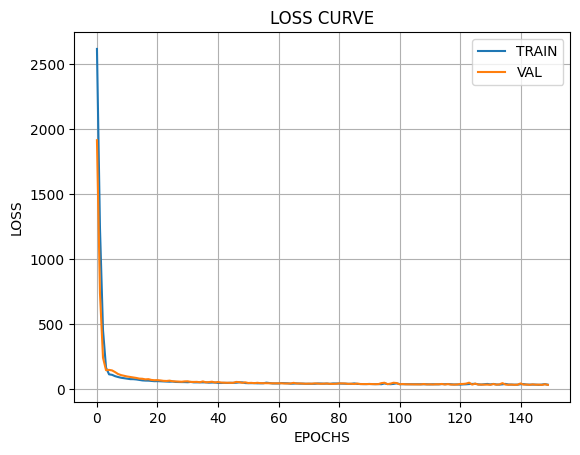

In [52]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
#plt.ylim((0,300))
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(["TRAIN", "VAL"])
plt.title("LOSS CURVE")
plt.grid()
plt.show()

In [26]:
ypred = model.predict(xtest)
ypred

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[23.73839  ],
       [29.091059 ],
       [17.731426 ],
       [25.480238 ],
       [23.112326 ],
       [21.80868  ],
       [23.04985  ],
       [20.840996 ],
       [23.909414 ],
       [23.060938 ],
       [23.113956 ],
       [23.823225 ],
       [ 8.112606 ],
       [23.082676 ],
       [24.26289  ],
       [23.481209 ],
       [22.100315 ],
       [21.906876 ],
       [32.185303 ],
       [23.865053 ],
       [27.770071 ],
       [28.725306 ],
       [21.5504   ],
       [23.81576  ],
       [19.432163 ],
       [21.16391  ],
       [23.896585 ],
       [ 2.4158223],
       [23.50035  ],
       [23.250528 ],
       [23.239271 ],
       [25.411934 ],
       [25.068182 ],
       [22.549698 ],
       [19.8175   ],
       [13.315984 ],
       [24.944635 ],
       [26.217491 ],
       [23.715796 ],
       [24.74607  ],
       [22.808067 ],
       [28.58599  ],
       [33.41945  ],
       [25.681683 ],
       [23.937073 ],
       [23.407787 ],
       [21.52696  ],
       [25.18

In [173]:
# Adding hidden layer to the model architecture for feature engineering - 3/11/2024

# Model Architecture
model = Sequential()
model.add(Input(shape=(13,)))       # No computation here - This is not mandatory
model.add(Dense(units=2, activation="relu"))    # HL1
model.add(Dense(units=1))           # Output layer # w1x1+w2x2+w3x3....

In [171]:
# Model Compilation
model.compile(optimizer=Adam(learning_rate = 0.1), loss="mean_squared_error", metrics=[RootMeanSquaredError()])
# model.compile(optimizer=Adadelta(learning_rate=0.1), loss="mean_squared_error", metrics=[RootMeanSquaredError()])

In [172]:
# Model Training
model.fit(xtrain, ytrain, epochs=200, validation_data=(xtest, ytest), batch_size=32)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 815.6506 - root_mean_squared_error: 28.2817 - val_loss: 415.2642 - val_root_mean_squared_error: 20.3780
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 443.7320 - root_mean_squared_error: 21.0563 - val_loss: 310.0033 - val_root_mean_squared_error: 17.6069
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 341.8712 - root_mean_squared_error: 18.4715 - val_loss: 229.3279 - val_root_mean_squared_error: 15.1436
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 254.0184 - root_mean_squared_error: 15.9358 - val_loss: 170.1219 - val_root_mean_squared_error: 13.0431
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 211.7879 - root_mean_squared_error: 14.5346 - val_loss: 129.4843 - val_root_mean_squared_error: 11.3791
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 151.1010 - root_mean_squared_error: 12.2873 - val_loss: 104.3376 - val_root_mean_squared_error: 10.2146
Epoch 7/200
11/11 ━━━

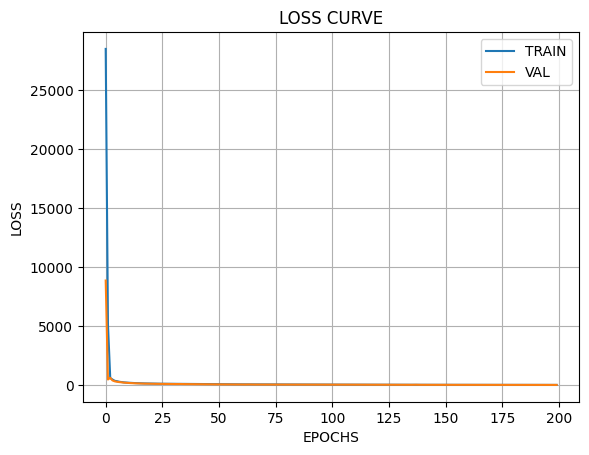

In [116]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
# plt.ylim((0,300))
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(["TRAIN", "VAL"])
plt.title("LOSS CURVE")
plt.grid()
plt.show()

In [154]:
# Changing the Optimizer and re-training

# Model Architecture
model = Sequential()
model.add(Input(shape=(13,)))       # No computation here - This is not mandatory
model.add(Dense(units=3, activation="relu"))    # HL1
model.add(Dense(units=1))           # Output layer # w1x1+w2x2+w3x3....

In [155]:
# Model Compilation
model.compile(optimizer=Adadelta(learning_rate=0.3), loss="mean_squared_error", metrics=[RootMeanSquaredError()])

In [156]:
# Model Training
model.fit(xtrain, ytrain, epochs=500, validation_data=(xtest, ytest), batch_size=32)

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 20875.0762 - root_mean_squared_error: 144.4797 - val_loss: 18140.2969 - val_root_mean_squared_error: 134.6859
Epoch 2/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17804.2988 - root_mean_squared_error: 133.4031 - val_loss: 15142.9131 - val_root_mean_squared_error: 123.0565
Epoch 3/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14537.6445 - root_mean_squared_error: 120.5673 - val_loss: 12714.6016 - val_root_mean_squared_error: 112.7590
Epoch 4/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12628.6621 - root_mean_squared_error: 112.3616 - val_loss: 10740.5615 - val_root_mean_squared_error: 103.6367
Epoch 5/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10682.0430 - root_mean_squared_error: 103.3145 - val_loss: 9111.1973 - val_root_mean_squared_error: 95.4526
Epoch 6/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9127.7988 - root_mean_squared_error: 95.4767 - val_loss: 7746.1616 - val_root_mean_squared_error:

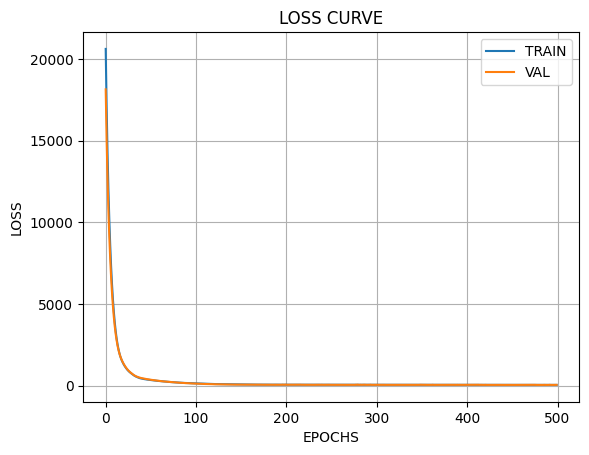

In [157]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
# plt.ylim((0,300))
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(["TRAIN", "VAL"])
plt.title("LOSS CURVE")
plt.grid()
plt.show()